<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). 
Translated and edited by [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/), [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #2. Fall 2018 <br> Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='../../img/plane_sunset.png' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true)
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 

### Your task is to:
 - write code and perform computations in the cells below
 - choose answers in the [webform](https://docs.google.com/forms/d/1qSTjLAGqsmpFRhacv0vM-CMQSTT_mtOalNXdRTcdtM0/edit)
 - submit answers with **the very same email and name** as in assignment 1. This is a part of the assignment, if you don't manage to do so, you won't get credits. If in doubt, you can re-submit A1 form till the deadline for A1, no problem
 
### <center> Deadline for A2: 2018 October 21, 20:59 CET



In [1]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

* Download the data [archive](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb). No need to unzip - pandas can unbzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

**Reading data into memory and creating a Pandas _DataFrame_ object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them suitable data types.

In [2]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

In [3]:
%%time
# change the path if needed
path = '../mlcourse.ai/data/2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 38.8 s, sys: 468 ms, total: 39.3 s
Wall time: 38.4 s


**Check the number of rows and columns and print column names.**

In [4]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [5]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


**Transpose the frame to see all features at once.**

In [6]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


**Examine data types of all features and total dataframe size in memory.**

In [7]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


**Get basic statistics of each feature.**

In [12]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [8]:
flights_df['UniqueCarrier'].nunique()

20

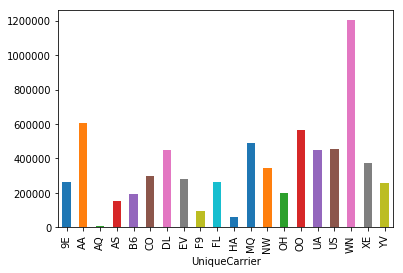

In [9]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [10]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [11]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [12]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

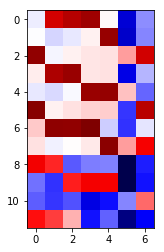

In [13]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

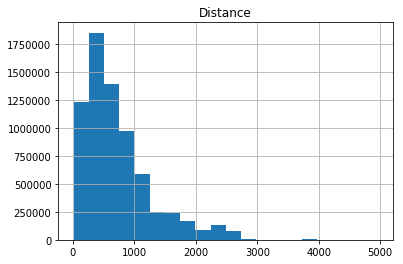

In [14]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [15]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [16]:
num_flights_by_date = flights_df.groupby('Date').size()

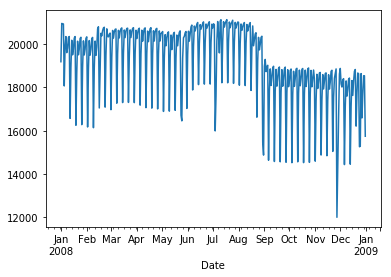

In [17]:
num_flights_by_date.plot();

**Do you see a weekly pattern above? And below?**

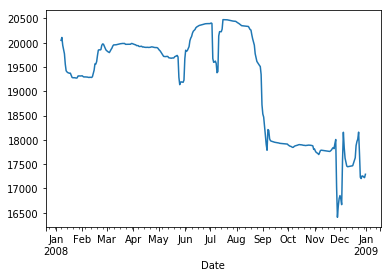

In [18]:
num_flights_by_date.rolling(window=7).mean().plot();

**1. Find top-10 carriers in terms of the number of completed flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**
- DL
- AA
- OO
- EV 

In [8]:
# You code here
completed_flights = flights_df[flights_df.Cancelled == 0]

completed_flights.shape

(6872294, 19)

In [9]:
uncompleted_flights = flights_df[flights_df.Cancelled == 1]

In [10]:
completed_flights.shape[0] + uncompleted_flights.shape[0] == flights_df.shape[0]

True

In [11]:
carrier_completed_flights = completed_flights.groupby(['UniqueCarrier']).size()
carrier_completed_flights

UniqueCarrier
9E     255108
AA     587445
AQ       7758
AS     148963
B6     192886
CO     294753
DL     445118
EV     275549
F9      95459
FL     259448
HA      61256
MQ     472362
NW     344746
OH     191145
OO     554723
UA     438974
US     447007
WN    1189365
XE     364518
YV     245711
dtype: int64

In [12]:
carrier_completed_flights.sum() == completed_flights.shape[0]

True

In [13]:
top_ten_flights = carrier_completed_flights.sort_values(ascending=False)[:10]

In [14]:
top_ten_flights

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
dtype: int64

In [15]:
top_carriers = top_ten_flights.index

<h1 style='color: red'>Ответ на первый вопрос</h1>

In [16]:
'DL' in top_carriers

True

In [17]:
'AA' in top_carriers

True

In [18]:
'OO' in top_carriers

True

In [19]:
'EV' in top_carriers

False

**2. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**
- carrier
- weather conditions 
- National Air System
- security reasons

In [20]:
cancell_code_translate = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'National Air System',
    'D': 'Security'
}
uncompleted_flights['CancellationCode'] = uncompleted_flights['CancellationCode'].apply(
    lambda x: cancell_code_translate[x]
)


/home/roman-baldaev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
uncompleted_flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
178,2008,1,3,4,NaN,WN,126,NaN,NaN,LAS,OAK,407,1,Carrier,NaN,NaN,NaN,NaN,NaN
373,2008,1,3,4,NaN,WN,1146,NaN,NaN,LAX,OAK,337,1,Carrier,NaN,NaN,NaN,NaN,NaN
399,2008,1,3,4,NaN,WN,469,NaN,NaN,LAX,SFO,337,1,Carrier,NaN,NaN,NaN,NaN,NaN
401,2008,1,3,4,NaN,WN,618,NaN,NaN,LAX,SFO,337,1,National Air System,NaN,NaN,NaN,NaN,NaN
415,2008,1,3,4,NaN,WN,2528,NaN,NaN,LAX,SJC,308,1,Carrier,NaN,NaN,NaN,NaN,NaN


In [22]:
cancell_code_count = uncompleted_flights.groupby(['CancellationCode']).size()

In [23]:
cancell_code_count

CancellationCode
Carrier                54330
National Air System    28188
Security                  12
Weather                54904
dtype: int64

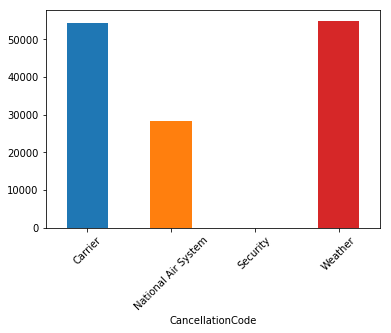

In [24]:
cancell_code_count.plot(kind='bar', rot=45)

<h1 style='color: red'>Ответ на 2 вопрос</h1>

In [25]:
cancell_code_count.sort_values(ascending=False).index[0]

'Weather'

**3. Which route is the most frequent, in terms of the number of flights?**

(Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes) 

 - New-York – Washington
 - San-Francisco – Los-Angeles 
 - San-Jose – Dallas
 - New-York – San-Francisco

In [26]:
# You code here
flights_df['Route'] = flights_df.Origin + "->" + flights_df.Dest




In [27]:
routes_count = flights_df.groupby(['Route']).size()

In [28]:
routes_count.sum() == flights_df.shape[0]

True

In [29]:
sort_routes_count = routes_count.sort_values(ascending=False)[:20]

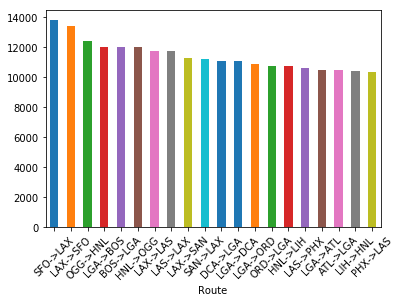

In [30]:
sort_routes_count.plot(kind='bar', rot=45)

<h1 style='color: red'>Ответ на 3 вопрос</h1>

In [31]:
# SFO - San Francisco, CA: San Francisco International, LAX - Los Angeles, CA: Los Angeles International
sort_routes_count.index[0]

'SFO->LAX'

**4. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

- 449 
- 539 
- 549 
- 668 

In [32]:
# You code here
flights_df_dropna_depdelay = flights_df[np.isfinite(flights_df['DepDelay'])]

In [33]:
flights_df_dropna_depdelay = flights_df_dropna_depdelay[flights_df_dropna_depdelay.DepDelay > 0]

In [34]:
flights_df_dropna_depdelay.shape

(2700974, 20)

In [35]:
routes_depdelay = flights_df_dropna_depdelay.groupby(['Route'])['DepDelay'].count()

In [36]:
routes_depdelay

Route
ABE->ATL     318
ABE->BHM       1
ABE->CLE     107
ABE->CLT      46
ABE->CVG      23
ABE->DTW     206
ABE->JFK       3
ABE->LGA       8
ABE->ORD     506
ABE->PHL       1
ABI->DFW     539
ABQ->AMA     203
ABQ->ATL     254
ABQ->AUS     166
ABQ->BWI     293
ABQ->CLE       1
ABQ->CVG      98
ABQ->DAL    1610
ABQ->DEN    1382
ABQ->DFW     748
ABQ->ELP     385
ABQ->EWR      55
ABQ->HOU     472
ABQ->IAD      83
ABQ->IAH     596
ABQ->LAS    1134
ABQ->LAX    1256
ABQ->LBB     176
ABQ->MAF     246
ABQ->MCI     272
            ... 
WRG->KTN     104
WRG->PSG     138
WYS->SLC      18
XNA->ATL     473
XNA->CVG       9
XNA->DCA      62
XNA->DEN     204
XNA->DFW     873
XNA->DTW     104
XNA->EWR     265
XNA->IAH     411
XNA->LAX     137
XNA->LEX       1
XNA->LGA     334
XNA->MEM     258
XNA->MIA      66
XNA->MSP     123
XNA->ORD    1085
XNA->RDU      30
XNA->RFD       1
XNA->SGF       1
YAK->CDV     130
YAK->JNU     126
YKM->SLC     108
YUM->GJT       1
YUM->IPL      93
YUM->LAS      27
YUM->LAX

In [37]:
top_five_routes_depdelay = routes_depdelay[np.isfinite(routes_depdelay)].sort_values(ascending=False)[:5]

In [38]:
top_five_routes_depdelay

Route
LAX->SFO    6253
DAL->HOU    5742
SFO->LAX    5322
ORD->LGA    5311
HOU->DAL    5288
Name: DepDelay, dtype: int64

In [39]:
list(top_five_routes_depdelay.index)

['LAX->SFO', 'DAL->HOU', 'SFO->LAX', 'ORD->LGA', 'HOU->DAL']

In [40]:
top_routes_depdelay_flights = flights_df[flights_df['Route'].isin(top_five_routes_depdelay.index)]

In [41]:
top_routes_depdelay_flights.Route.unique()

array(['LAX->SFO', 'SFO->LAX', 'DAL->HOU', 'HOU->DAL', 'ORD->LGA'],
      dtype=object)

In [45]:
top_routes_depdelay_flights = top_routes_depdelay_flights[np.isfinite(top_routes_depdelay_flights['WeatherDelay'])] 

In [46]:
top_routes_depdelay_flights.shape

(14778, 21)

<h1 style='color: red'>Ответ на 4 вопрос</h1>

In [47]:
top_routes_depdelay_flights[top_routes_depdelay_flights.WeatherDelay > 0].shape[0]

668

**5. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

In [42]:
# You code here
flights_df_dropna_deptime = flights_df[np.isfinite(flights_df.DepTime)]

In [43]:
flights_df_dropna_deptime.shape

(6873482, 20)

In [44]:
deptime_hour = flights_df_dropna_deptime['DepTime'].apply(lambda x: x/100)

<h1 style='color: red'>Ответ на 5 вопрос</h1>

/home/roman-baldaev/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


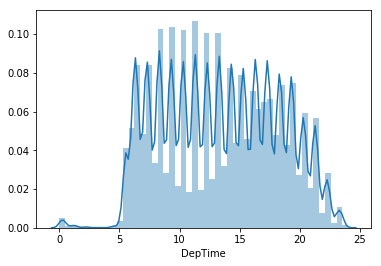

In [45]:
sns.distplot(deptime_hour)

/home/roman-baldaev/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


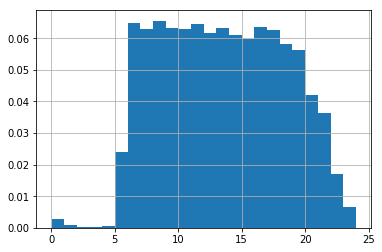

In [46]:
deptime_hour.hist(bins=24,normed=True)

In [53]:
from scipy import stats

In [54]:
k2, p = stats.normaltest(deptime_hour)

In [55]:
"p = {:g}".format(p)

'p = 0'

In [56]:
k2

1456635.1520346398

**6. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.  

In [47]:
# You code here
weekdays_translate = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday',
}

In [48]:
month_translate = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

In [49]:
flights_df['DayWeekName'] = flights_df['DayOfWeek'].apply(lambda x: weekdays_translate[x]) 

In [50]:
flights_df['MonthName'] = flights_df['Month'].apply(lambda x: month_translate[x]) 

In [51]:
flights_df

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,...,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Route,DayWeekName,MonthName
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,...,0,NaN,NaN,NaN,NaN,NaN,NaN,IAD->TPA,Thursday,January
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,...,0,NaN,NaN,NaN,NaN,NaN,NaN,IAD->TPA,Thursday,January
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,IND->BWI,Thursday,January
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,IND->BWI,Thursday,January
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,...,0,NaN,2.0,0.0,0.0,0.0,32.0,IND->BWI,Thursday,January
5,2008,1,3,4,1940.0,WN,378,11.0,25.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,IND->JAX,Thursday,January
6,2008,1,3,4,1937.0,WN,509,57.0,67.0,IND,...,0,NaN,10.0,0.0,0.0,0.0,47.0,IND->LAS,Thursday,January
7,2008,1,3,4,1039.0,WN,535,-18.0,-1.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,IND->LAS,Thursday,January
8,2008,1,3,4,617.0,WN,11,2.0,2.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,IND->MCI,Thursday,January
9,2008,1,3,4,1620.0,WN,810,-16.0,0.0,IND,...,0,NaN,NaN,NaN,NaN,NaN,NaN,IND->MCI,Thursday,January


In [52]:
count_flights_by_weekday = flights_df.groupby(['DayWeekName']).size()

<h1 style='color: red'>Ответ на 6 вопрос</h1>

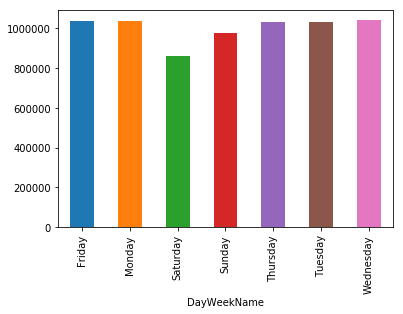

In [53]:
count_flights_by_weekday.plot(kind='bar')

In [54]:
count_flights_by_month = flights_df.groupby(['MonthName']).size()

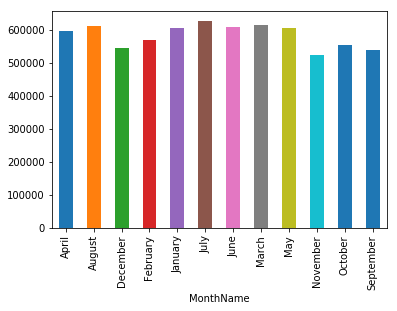

In [55]:
count_flights_by_month.plot(kind='bar')

In [56]:
count_flights_by_month.December + count_flights_by_month.January + count_flights_by_month.February

1719959

In [57]:
count_flights_by_month.June + count_flights_by_month.July + count_flights_by_month.August

1848875

**7. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

**Choose all correct statements:**
- December has the highest rate of cancellations due to weather. 
- The highest rate of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

In [58]:
# You code here
uncompleted_flights = flights_df[flights_df.Cancelled == 1]
uncompleted_flights['CancellationCode'] = uncompleted_flights['CancellationCode'].apply(
    lambda x: cancell_code_translate[x]
)
cancell_months = uncompleted_flights[['CancellationCode', 'MonthName']]

/home/roman-baldaev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [59]:
# cancell_months = cancell_months.groupby(['CancellationCode'])['MonthName'].count()

<h1 style='color: red'>Ответ на 7 вопрос</h1>

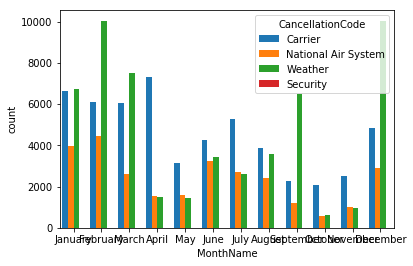

In [60]:
sns.countplot(x='MonthName', hue='CancellationCode', data=cancell_months, saturation=10)

In [61]:
cancell_months[(cancell_months.MonthName == 'December') & (cancell_months.CancellationCode == 'Weather')].shape

(10042, 2)

In [62]:
cancell_months[(cancell_months.MonthName == 'February') & (cancell_months.CancellationCode == 'Weather')].shape

(10034, 2)

**8. Which month has the greatest number of cancellations due to Carrier?** 
- May
- January
- September
- April 

In [22]:
# You code here

**9. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

- 9E
- EV
- HA
- AA

In [63]:
# You code here
april_carrier_due = flights_df[(flights_df.Cancelled == 1) & 
                               (flights_df.CancellationCode == 'A') & 
                               (flights_df.MonthName == 'April')]

In [64]:
april_carrier_due.Cancelled.unique(), april_carrier_due.CancellationCode.unique(), april_carrier_due.MonthName.unique()

(array([1], dtype=uint64),
 array(['A'], dtype=object),
 array(['April'], dtype=object))

In [65]:
april_carrier_due.shape[0]

7312

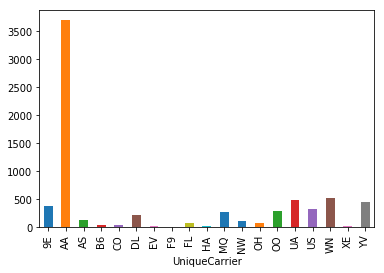

In [84]:
april_carrier_due.groupby('UniqueCarrier').size().plot(kind="bar")

**10. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
[Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile.**

- EV
- OO
- AA
- AQ 

In [66]:
exist_delay = flights_df[flights_df.DepDelay.notna()]
flights_df.loc[(flights_df['ArrDelay'] > 0), 'ArrDelay'].astype(float)

1            2.0
2           14.0
4           34.0
5           11.0
6           57.0
8            2.0
10           1.0
11          80.0
12           1.0
13          10.0
15          11.0
16          15.0
18          16.0
19          37.0
21          19.0
22           6.0
25          14.0
26          47.0
27           4.0
30          64.0
35          14.0
37          72.0
38           5.0
39          11.0
40          29.0
47           8.0
48          21.0
49         304.0
52          35.0
53          49.0
           ...  
7009669      5.0
7009671     20.0
7009673     48.0
7009675     21.0
7009677      1.0
7009681      2.0
7009682      2.0
7009683     24.0
7009684      7.0
7009687      2.0
7009688      1.0
7009692     11.0
7009696     32.0
7009699     21.0
7009701     38.0
7009703      1.0
7009705     64.0
7009708     13.0
7009709     17.0
7009710     25.0
7009712      4.0
7009715     19.0
7009717     75.0
7009718     99.0
7009719     15.0
7009720      6.0
7009721     16.0
7009722      2

In [67]:
exist_delay = exist_delay[exist_delay.ArrDelay.notna()]

In [68]:
flights_df.DepDelay = flights_df.DepDelay.astype(float)

In [69]:
flights_df.ArrDelay = flights_df.ArrDelay.astype(float)

In [70]:
delays = flights_df[(flights_df.DepDelay >= 0) & 
                    (flights_df.ArrDelay >= 0)]

In [71]:
delays.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2320755.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,2320755.0,6.105703,3.460425,1.0,3.0,6.0,9.0,12.0
DayofMonth,2320755.0,15.746214,8.766195,1.0,8.0,16.0,23.0,31.0
DayOfWeek,2320755.0,3.965047,1.989251,1.0,2.0,4.0,6.0,7.0
DepTime,2320755.0,NaN,NaN,1.0,1122.0,1512.0,1841.0,2400.0
FlightNum,2320755.0,2217.618388,1957.173513,1.0,622.0,1568.0,3503.0,9741.0
ArrDelay,2320755.0,37.967594,52.668979,0.0,7.0,20.0,47.0,2460.0
DepDelay,2320755.0,35.453262,51.333333,0.0,6.0,18.0,45.0,2468.0
Distance,2320755.0,739.476457,564.472143,11.0,331.0,589.0,967.0,4962.0
Cancelled,2320755.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


## суммируем ArrDelay и DepDelay

In [72]:
delays['Delays'] = delays.ArrDelay + delays.DepDelay

/home/roman-baldaev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


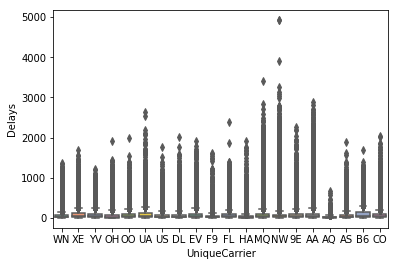

In [73]:
# AQ has min median
ax = sns.boxplot(x="UniqueCarrier", y="Delays", palette="Set2", data=delays)

In [74]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
arr_scaled = min_max_scaler.fit_transform(delays.ArrDelay.values.reshape(-1, 1))
dep_scaled = min_max_scaler.fit_transform(delays.DepDelay.values.reshape(-1, 1))
delays_scaled = min_max_scaler.fit_transform(delays.Delays.values.reshape(-1, 1))

In [75]:
delays['arr_scaled'] = arr_scaled

/home/roman-baldaev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
delays['dep_scaled'] = dep_scaled

/home/roman-baldaev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
delays['delays_scaled'] = delays_scaled

/home/roman-baldaev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
delays.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2320755.0,2008.000000,0.000000,2008.0,2008.000000,2008.000000,2008.000000,2008.0
Month,2320755.0,6.105703,3.460425,1.0,3.000000,6.000000,9.000000,12.0
DayofMonth,2320755.0,15.746214,8.766195,1.0,8.000000,16.000000,23.000000,31.0
DayOfWeek,2320755.0,3.965047,1.989251,1.0,2.000000,4.000000,6.000000,7.0
DepTime,2320755.0,NaN,NaN,1.0,1122.000000,1512.000000,1841.000000,2400.0
FlightNum,2320755.0,2217.618388,1957.173513,1.0,622.000000,1568.000000,3503.000000,9741.0
ArrDelay,2320755.0,37.967594,52.668979,0.0,7.000000,20.000000,47.000000,2460.0
DepDelay,2320755.0,35.453262,51.333333,0.0,6.000000,18.000000,45.000000,2468.0
Distance,2320755.0,739.476457,564.472143,11.0,331.000000,589.000000,967.000000,4962.0
Cancelled,2320755.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


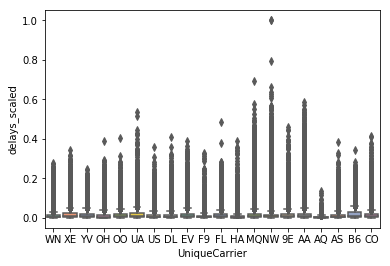

In [78]:
ax = sns.boxplot(x="UniqueCarrier", y="delays_scaled", palette="Set2", data=delays)

### проверим bar графиком

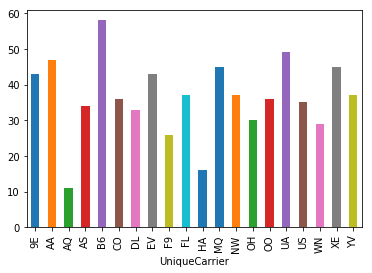

In [79]:
delays.groupby('UniqueCarrier')['Delays'].median().plot(kind="bar")

## Проверим отдельно медианы для ArrDelay и DepDelay

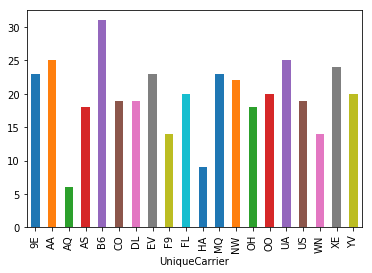

In [80]:
delays.groupby('UniqueCarrier')['ArrDelay'].median().plot(kind="bar")

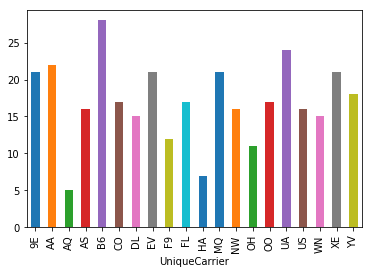

In [81]:
delays.groupby('UniqueCarrier')['DepDelay'].median().plot(kind="bar")